In [106]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt


In [107]:
#read in all the words

words = open('drive/MyDrive/Colab Notebooks/names.txt', 'r').read().splitlines()


In [108]:
#build vocabulary of characters  and mappings to/from integers

chars = sorted(list(set(''.join(words))))

stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [109]:
#building the dataset

#block_size = 3
#X, Y = [], []
#for w in words:
  #print(w)
#  context = [0]* block_size

#  for ch in w + '.':
#   ix = stoi[ch]
#   X.append(context)
#   Y.append(ix)
#   #print(''.join(itos[i] for i in context),'--->', itos[ix])
#   context = context[1:]+[ix]

#X = torch.tensor(X)
#Y = torch.tensor(Y)


In [110]:
def build_dataset(words):
  block_size = 3
  X, Y = [], []
  for w in words:
    #print(w)
    context = [0]* block_size

    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context),'--->', itos[ix])
      context = context[1:]+[ix]

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182507, 3]) torch.Size([182507])
torch.Size([22706, 3]) torch.Size([22706])
torch.Size([22933, 3]) torch.Size([22933])


In [111]:
C = torch.rand((27,10))




In [112]:
W1 = torch.randn((30,200))
b1 = torch.randn(200)
W2 = torch.randn((200,27))
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]


In [113]:
for p in parameters:
  p.requires_grad = True

In [114]:
lre = torch.linspace(-3, 0,1000)
lrs = 10**lre

In [115]:
lri = []
lossi = []
stepi = []

In [116]:





for i in range(50000):

  #minibatch construct
  ix = torch.randint(0,Xtr.shape[0],(32,))

  # forward pass
  emb = C[Xtr[ix]]
  h = torch.tanh(emb.view(-1,30 ) @ W1 + b1)
  logits = h @ W2 + b2
  #counts = logits.exp()
  #prob = counts / counts.sum(1, keepdims=True)

  #loss = -prob[torch.arange(32), Y].log().mean()

  loss = F.cross_entropy(logits, Ytr[ix])
  # print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()



  #update
  #lr = lrs[i]
  lr = 0.01
  for p in parameters:
    p.data += -lr * p.grad

  #track stats
  stepi.append(i)
  lri.append(lr)
  lossi.append(loss.log10().item())


print(loss.item())



2.1970102787017822


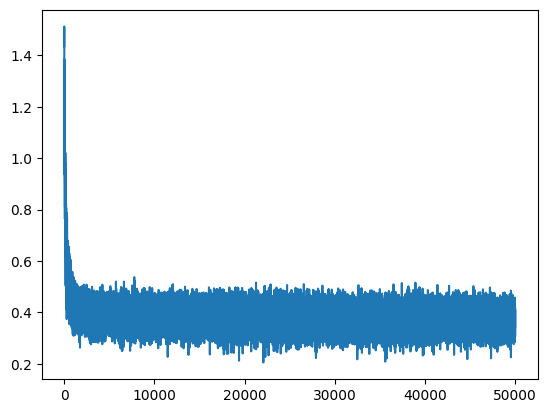

In [117]:
plt.plot(stepi, lossi)

In [118]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1,30)@ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
print(loss.item())

2.3724617958068848


In [119]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1,30)@ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

2.3931362628936768


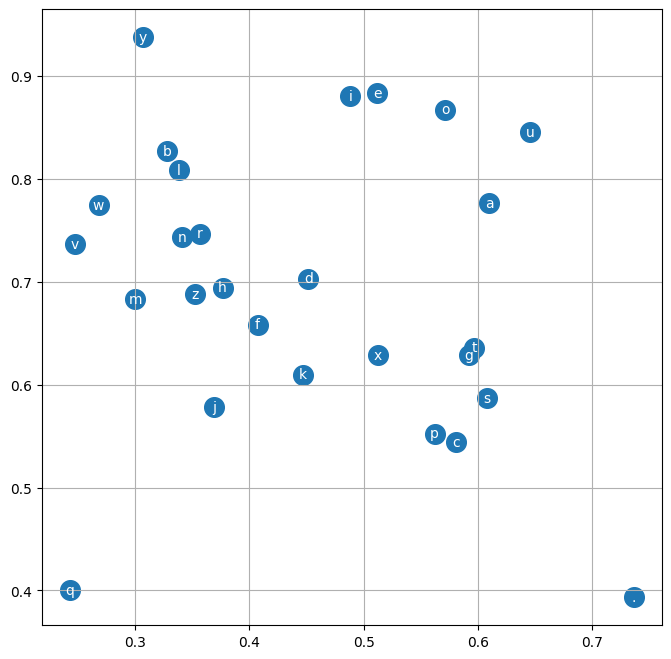

In [120]:
plt.figure(figsize=(8,8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
  plt.text(C[i, 0].item(),C[i, 1].item(), itos[i], ha='center', va='center', color='white')
plt.grid('minor')

In [121]:
#plt.plot(lri, lossi)

In [122]:
#training split, dev/validation split, test split
#80%, 10%, 10%

In [123]:
#sampling

for _ in range(20):
  out = []
  context = [0]* block_size
  while True:
    emb=C[torch.tensor([context])]
    h = torch.tanh(emb.view(1,-1)@ W1 +b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits, dim=1)
    ix = torch.multinomial(probs, num_samples=1).item()
    context = context[1:] + [ix]
    out.append(ix)
    if ix == 0:
      break
  print(''.join(itos[i] for i in out))


zaysanzolva.
kalda.
zay.
haidenke.
tia.
nas.
nuie.
grioli.
trongevin.
zahs.
whensoj.
rol.
thizo.
tonjoohinanafgib.
tyeahhariyanh.
ahjessi.
sare.
radyblanhlam.
eoradeo.
anaeso.
